# Hands-on LH1: the $\mathrm{TE}_{10}$-$\mathrm{TE}_{30}$ Mode Converter

## Introduction

The Tore Supra Lower Hybrid Launchers are equiped by $\mathrm{TE}_{10}$-$\mathrm{TE}_{30}$ mode converters, a waveguide structure which convert the RF power from a propagation mode to another, in order to split the power by three in the poloidal direction. The electric field topology in this device is illustrated in the following figure.

<img src="./LH1_Mode-Converter_data/Efield.png">

  

During this hands-on, students are initiated to RF measurements and analysis. Before measuring the RF performances of a mode converter, the students are brought to calibrate the RF measurement apparatus, a (Vectorial) Network Analyser. This device measures the scattering parameters (or S-parameters) between two ports, generally referred as ports 1 and 2. The scattering parameters are defined in terms of incident and reflected waves at ports, and are widely used at microwave frequencies where it becomes difficult to measure voltages and currents directly.  

Before starting, let's import the necessary Python libraries:

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# and also import the numpy library   
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Scattering parameters measurement

The following figure illustrates the measurement setup, and the adopted port indexing convention. 

<img src="./LH1_Mode-Converter_data/setup2.png">

Below we import the measurements data generated by the network analyser. These data consist in an ASCII file (tab separated file), with the following usual header :

where we have, by column number:  

1. The frequency in Hertz, 
2. The amplitude of the $S_{11}$ parameter in decibel (dB),
3. The phase of the $S_{11}$ parameter in degree, 
4. The amplitude of the $S_{21}$ parameter in decibel (dB),
5. The phase of the $S_{21}$ parameter in degree, 

and etc for $S_{12}$ and $S_{22}$.

Below we import the first measurement data, performed between the port indexed "0" of the mode converter (the input, corresponding to the port 1 of the network analyser) and the port indexed "1" of the mode converter (corresponding to port 2 of the network analyser).

In [2]:
%cd C:\Users\JH218595\Documents\Notebooks\TP Master Fusion

[WinError 2] Le fichier spécifié est introuvable: 'C:\\Users\\JH218595\\Documents\\Notebooks\\TP Master Fusion'
C:\Users\JH218595\Documents\Documents_GitHub\notebooks\TP Master Fusion


In [3]:
CDM1 = np.loadtxt('./LH1_Mode-Converter_data/CDM01', skiprows=4)
f_1 = CDM1[:,0]

The measurement contains $N$ frequency points, where $N$ is: 

In [4]:
len(f_1)

201

Let's have a look to these data, for example by plotting the amplitude of the $S_{10}$ parameter, that is the ratio of the power coming from port 0 to port 1 (which corresponds to $S_{21}$  in the network analyser file).   

Text(0.5,1,'$S_{10}$ amplitude vs frequency')

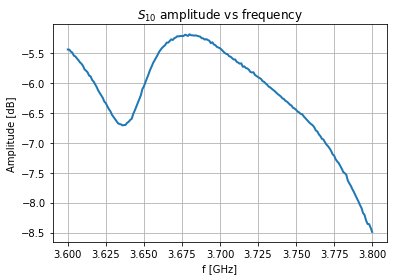

In [5]:
S10_dB = CDM1[:,3]
plot(f_1/1e9,S10_dB, lw=2)
xlabel('f [GHz]')
ylabel('Amplitude [dB]')
grid('on')
title('$S_{10}$ amplitude vs frequency')

OK. Let's do the same for the second and third measurements performed, that is for the power transferred from port 0 to ports 2 and 3. 

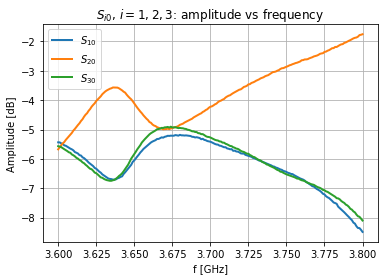

In [6]:
CDM2 = loadtxt('LH1_Mode-Converter_data/CDM02', skiprows=4)
CDM3 = loadtxt('LH1_Mode-Converter_data/CDM03', skiprows=4)

f_2 = CDM2[:,0]
f_3 = CDM3[:,0]

S20_dB = CDM2[:,3]
S30_dB = CDM3[:,3]
S00_dB = CDM1[:,1]

plot(f_1/1e9, S10_dB, f_2/1e9, S20_dB, f_3/1e9, S30_dB, lw=2)
xlabel('f [GHz]')
ylabel('Amplitude [dB]')
grid('on')
title('$S_{i0}$, $i=1,2,3$: amplitude vs frequency')
legend(('$S_{10}$','$S_{20}$', '$S_{30}$'),loc='best')

Nice. Now, let's stop and think. The purpose of the mode converter is the transfer the power from the fundamental mode of rectangular waveguides, namely the $\mathrm{TE}_{10}$, into a higher order mode, the $\mathrm{TE}_{30}$. Once these mode conversion achieved, thin metallic wall septum are located in zero E-field regions, which allows to split the power into three independant waveguides.

Dividing the power by 3, is equivalent in decibels to:

In [7]:
10*log10(1.0/3.0)

-4.7712125471966242

Thus, ideally, the three transmission scattering parameters should be equal to -4.77 dB at the operational frequency, 3.7 GHz in our case. Clearly from the previous figure we see that it is not the case. The power splitting is unbalanced, and more power is directed to port 2 than to ports 1 and 3 at 3.7 GHz. In conclusion of this first serie of measurements: this mode converter is not working properly. The big deal is: "why ?".

Before continuying, it may be usefull to define a function that convert a (dB,degree) number into a natural complex number:  

In [8]:
def dBdegree_2_natural(ampl_dB, phase_deg):
    amp = 10**(ampl_dB/20)
    phase_rad = np.pi/180*phase_deg
    return amp*np.exp(1j*phase_rad)

Thus, we can convert the (dB,degree) data into natural (real,imaginary) numbers 

In [9]:
S00 = dBdegree_2_natural(CDM1[:,1],CDM1[:,2])
S10 = dBdegree_2_natural(CDM1[:,3],CDM1[:,4])
S20 = dBdegree_2_natural(CDM2[:,3],CDM2[:,4])
S30 = dBdegree_2_natural(CDM3[:,3],CDM3[:,4])

Let's check the power conservation. If the calibration has been correctly performed and if the conduction losses are negligible, one has: $$\sum_{i=0\ldots 3} \left | S_{j0} \right|^2 = 1$$
Let's try:

(0, 1)

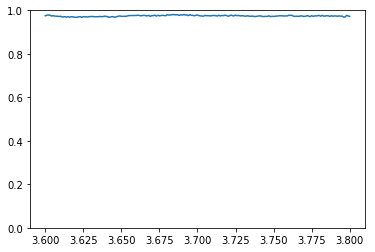

In [10]:
# Check the power conservation in dB : reflected+incident = all the power
plot(f_1/1e9, 10**(S00_dB/10)+10**(S10_dB/10)+10**(S20_dB/10)+10**(S30_dB/10))
ylim([0, 1])

(0, 1)

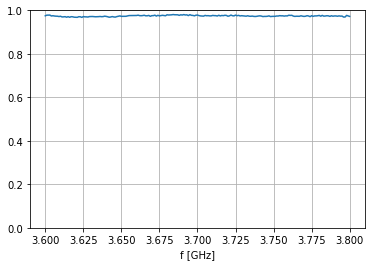

In [11]:
plot(f_1/1e9, sum([abs(S00)**2,abs(S10)**2,abs(S20)**2,abs(S30)**2],axis=0))
xlabel('f [GHz]')
grid('on')
ylim([0, 1])

We are close to 1. The difference is the conduction losses, but also the intrinsic measurement error. Let's see how much power is lost in the device in terms of percent : 

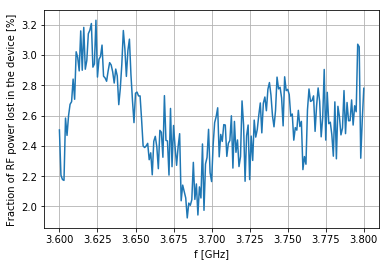

In [12]:
plot(f_1/1e9, 100*(1-sum([abs(S00)**2,abs(S10)**2,abs(S20)**2,abs(S30)**2],axis=0)))
xlabel('f [GHz]')
ylabel('Fraction of RF power lost in the device [%]')
grid('on')

## Electric field measurements

In the previous section we figured out that the mode converter was not working properly as a 3-way splitter; indeed the power splitting is unbalanced. It's now time to understand why, since the guy who performed the RF modeling of the stucture is very good and is sure that his design is correct. In order to dig into this problem, we propose to probe the electric field after the mode converter but before the thin septum splitter: the objective is to "see" what is the electric field topology after the mode conversion (is it as we expect it should be?). But by the way, how should it be?   

If the mode converter has performed well, the totality of the electromagnetic field should behave as a $\mathrm{TE}_{30}$ mode.

In [13]:
# Electric field measurement
# Measurement Hands-On Group #1
# Feb 2013
# columns correspond to hole rows 1,2,3
ampl_dB = -1.0*np.array([           # use a numpy array in order to avoid the caveat to multiply a list by a float
              [31.3, 32.0, 31.2],
              [30.6, 31.2, 30.2],
              [33.2, 33.3, 32.5],
              [42.8, 42.0, 41.7],
              [40.1, 41.3, 40.6],
              [32.7, 33.5, 32.7],
              [31.2, 31.4, 30.9],
              [32.5, 33.0, 32.8],
              [39.1, 39.9, 40.9],
              [46.6, 44.0, 42.0],
              [34.8, 33.2, 33.2],
              [32.4, 30.6, 30.6],
              [33.3, 30.9, 32.0]])

phase_deg = np.array(
            [[-111.7,  64.9, -119.2],
             [-111.9,  67.2, -119.9],
             [-110.7,  67.1, -119.8],
             [-99.1,   75.7, -119.7],
             [55.90, -127.4,   60.1],
             [60.4,  -123.3,   59.2],
             [64.3,  -117.4,   62.8],
             [61.3,  -119.7,   63.3],
             [50.9,  -118.3,   68.1],
             [-95.8,   70.5, -120.9],
             [-107.9,  74.1, -116.0],
             [-112.0,  71.2, -112.6],
             [-116.6,  72.4, -116.0]])

Let's check if we have the same number of points for amplitude and phase:

In [14]:
shape(ampl_dB) == shape(phase_deg)

True

What does it look like?


In [15]:
f = 3.7e9 # fréquence de la mesure
a = 192e-3 # largeur grand coté du guide surdimensionné
b = 40e-3

## On ne prend que N mesures aux N abscisses de mesures
# définition des emplacements des N abscisses :
x_mes = 24e-3 + arange(0, 12*12e-3, step=12e-3) # Modele @3.7GHz d'après S.Berio
x = linspace(0, a, 100) # theorical values

## Mesures tirées de la thèse de S.Berio p.30
# definition des emplacements des 3 séries de "mesures"
z_mes = [0, 28*1e-3, 100*1e-3]

z_mes = [0, 53*1e-3, 106*1e-3]


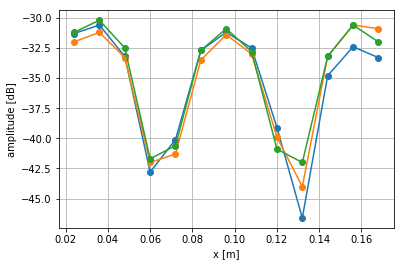

In [16]:
plot(x_mes, ampl_dB, '-o')
xlabel('x [m]')
ylabel('amplitude [dB]')
grid()

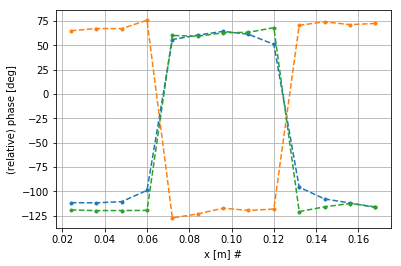

In [17]:
plot(x_mes, phase_deg, '--.')
xlabel('x [m] #')
ylabel('(relative) phase [deg]')
grid()

In natural values

In [18]:
measures = dBdegree_2_natural(ampl_dB, phase_deg)

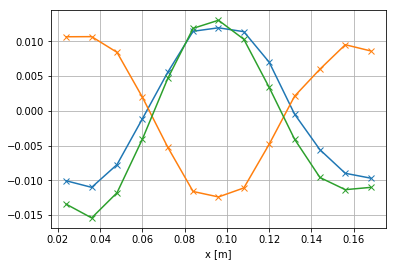

In [19]:
plot(x_mes, real(measures),'-x')
xlabel('x [m]')
grid('on')

From the previous amplitude figures, one can remark that the measureed amplitude is not ideal: the maxima and the minima seem not have exactly the same values. Thus is seems that the mode after the mode converter is not a pure $\mathrm{TE}_{30}$, but probably a mixture of various modes. The question is : what is that mixture of modes? Our objective is to deduce that from the Efield probe data. 

## Electromagnetic model

Let's define first some usefull functions:

The following function calculates the electric field at a point $(x,z)$ of the waveguide of shape $(a,b)$ for $N$ modes:
$$
E_y (x,z) = \sum_{n=1}^N a_n \sin\left(\frac{n\pi}{a}x \right) e^{-j \beta_n z}
$$
where
$$
\beta_n = \sqrt{k_0^2 - \left(\frac{n\pi}{a}\right)^2}
$$

In [20]:
from scipy.constants import c

def Ey(a_n, x, z, wg_a=192e-3, f=3.7e9):
    '''
    Evaluates the electric field at the (x,z) location 
    x and z should be scalars
    '''

    k0 = 2*pi*f/c
    
    sin_n = np.zeros_like(a_n, dtype='complex')
    beta_n = np.zeros_like(a_n, dtype='complex')
    exp_n = np.zeros_like(a_n, dtype='complex')
    exp_n2 = np.zeros_like(a_n, dtype='complex')
    
    N_modes = len(a_n)
    
    for n in np.arange(N_modes):
        # Guided wavenumber
        # use a negative imaginary part for the square root
        # in order to insure the convergence of the exponential
        if k0**2 - ((n+1)*pi/wg_a)**2 >= 0:
            beta_n[n] = np.sqrt(k0**2 - ((n+1)*pi/wg_a)**2)
        else:
            beta_n[n] = -1j*np.sqrt(((n+1)*pi/wg_a)**2 - k0**2)
            
        exp_n[n] = np.exp(-1j*beta_n[n]*z)
            
        sin_n[n] = np.sin((n+1)*pi/wg_a*x)
        
    # sum of the modes    
    Ey = np.sum(a_n*sin_n*exp_n)
    
    return Ey

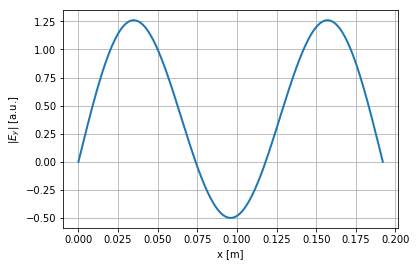

In [21]:
u_n = np.array([0.5, 0, 1,])
x_test = linspace(0, 192e-3, 201)
z_test = zeros_like(x_test)
E_test = zeros_like(x_test, dtype='complex')
for idx in range(len(x_test)):
    E_test[idx] = Ey(u_n, x_test[idx], z_test[idx])

plot(x_test, real(E_test), lw=2)
xlabel('x [m]')
ylabel('|$E_y$| [a.u.]')
grid()

## Least Square solving with Python scipy routines

In [22]:
print(x_mes)

[ 0.024  0.036  0.048  0.06   0.072  0.084  0.096  0.108  0.12   0.132
  0.144  0.156  0.168]


In [23]:
print(z_mes)

[0, 0.053, 0.106]


In [24]:
Emeas = dBdegree_2_natural(ampl_dB, phase_deg)

We prescribe additional information concerning the field at the edge : we know the field should be zero in x=0 and x=a. 

In [25]:
x_mes = hstack((0, x_mes, a))
Emeas = vstack((array([0,0,0]), Emeas, array([0,0,0]) ))

In [26]:
# Let's reshape x_mes and z_mes vectors 
# in order to get position vectors with the same length
# x -> [x1 ... x13 x1 ... x13 x1 ... x13]
# z -> [z1 ... z1  z2 ... z2  z3 ...  z3]
XX = tile(x_mes, len(z_mes))
ZZ = repeat(z_mes, len(x_mes))

# and the same for the measurements :
# Emes -> [E(x1,z1) ... E(x13,z1) E(x1,z2) ... E(x13,z2) E(x1,z3) ... E(x13,z3)]
EEmeas = reshape(Emeas, size(Emeas), order='F') # order='F' is important to get the correct ordering

In [27]:
def optim_fun(a, x, z):
    Emodel = zeros_like(x, dtype='complex')
    
    for idx in range(len(x)):
        Emodel[idx] = Ey(a, x[idx], z[idx])
        
    y = EEmeas - Emodel
    return y.real**2 + y.imag**2

In [28]:
from scipy.optimize import leastsq
a0 = np.array([1,0,1,0,0])
sol=leastsq(optim_fun, a0, args=(XX, ZZ))
a_sol = sol[0]
print(abs(a_sol)/norm(sol[0],1)*100)

[ 13.76141653   3.66641546  76.34252298   3.26640217   2.96324286]


We deduce that there is 76% of TE30 mode and 13% of TE10 mode, 3% of TE40 and 50

Text(0.5,1,'z3')

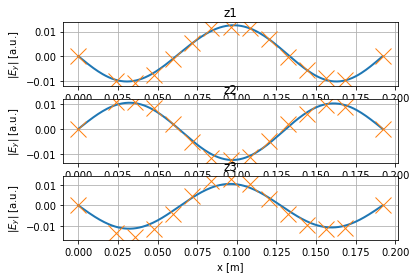

In [29]:
x_test = linspace(0, a, 201)

def subplote(x_test, z, a, Emes):
    E_test = zeros_like(x_test, dtype='complex')
    
    for idx in range(len(x_test)):
        E_test[idx] = Ey(a, x_test[idx], z)

    plot(x_test, real(E_test), lw=2)
    plot(x_mes, real(Emes), 'x', ms=16, lw=2)
    xlabel('x [m]')
    ylabel('|$E_y$| [a.u.]')
    grid()
    
subplot(311)
subplote(x_test, z_mes[0], a_sol, Emeas[:,0])
title('z1')
subplot(312)
subplote(x_test, z_mes[1], a_sol, Emeas[:,1])
title('z2')
subplot(313)
subplote(x_test, z_mes[2], a_sol, Emeas[:,2])
title('z3')


## Least Square Equation Solving
We can also directly solve the problem, by defining
$$
\phi_{ij} = \sin\left(\frac{j \pi}{a} x_i \right) e^{-j \beta_j z_i}
$$
Then
$$
\vec{a} = \left( \phi^T \phi \right)^{-1} \phi^T \vec{E}_{meas}
$$

In [30]:
def phi(n, x, z, wg_a=192e-3, f=3.7e9):
    k0 = 2*pi*f/c
    
    if k0**2 - (n*pi/wg_a)**2 >= 0:
        beta_n = np.sqrt(k0**2 - (n*pi/wg_a)**2)
    else:
        beta_n = -1j*np.sqrt((n*pi/wg_a)**2 - k0**2)
            
    return  np.sin(n*pi/wg_a*x) * np.exp(-1j*beta_n*z)

In [31]:
MAT = np.array([phi(1, XX, ZZ), phi(2, XX, ZZ), phi(3, XX, ZZ), phi(4, XX, ZZ), phi(5, XX, ZZ)]).T

In [32]:
a_sol = np.linalg.inv(np.dot(MAT.T, MAT)).dot(MAT.T).dot(EEmeas) 
print(abs(a_sol)/norm(a_sol,1)*100)

[  9.0833406    3.65953167  71.65895146  13.93531265   1.66286363]


This evaluation gives 71% of TE30 mode and 9 % for TE10.

Text(0.5,1,'z3')

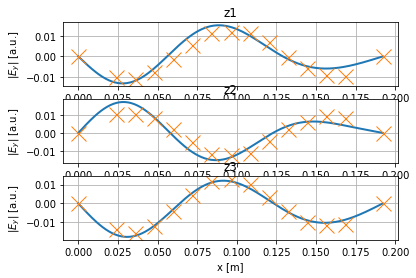

In [33]:
x_test = linspace(0, a, 201)

def subplote(x_test, z, a, Emes):
    E_test = zeros_like(x_test, dtype='complex')
    
    for idx in range(len(x_test)):
        E_test[idx] = Ey(a, x_test[idx], z)

    plot(x_test, real(E_test), lw=2)
    plot(x_mes, real(Emes), 'x', ms=15, lw=2)
    xlabel('x [m]')
    ylabel('|$E_y$| [a.u.]')
    grid()
    
subplot(311)
subplote(x_test, z_mes[0], a_sol, Emeas[:,0])
title('z1')
subplot(312)
subplote(x_test, z_mes[1], a_sol, Emeas[:,1])
title('z2')
subplot(313)
subplote(x_test, z_mes[2], a_sol, Emeas[:,2])
title('z3')

## 2D plot view

In [34]:
x = linspace(0, a, 201)
z = linspace(-0.1e-2, 15e-2, 301)

XX, ZZ = meshgrid(x,z)
XX2 = reshape(XX, len(x)*len(z))
ZZ2 = reshape(ZZ, len(x)*len(z))
E_2D = zeros_like(XX2, dtype='complex')
for idx in range(len(XX2)):
    E_2D[idx] = Ey(a_sol, XX2[idx], ZZ2[idx])

E_2D = reshape(E_2D, (len(z), len(x))) 

(0.0, 0.192)

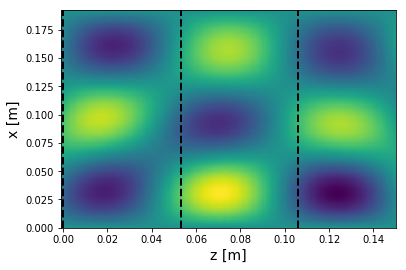

In [35]:
pcolormesh(ZZ, XX, real(E_2D))
xlabel('z [m]', size=14)
ylabel('x [m]', size=14)
for idx in range(3):
    axvline(z_mes[idx], color='k', ls='--', lw=2)
xlim(z[0], z[-1])
ylim(x[0], x[-1])

# Finding the mode content using the Fast Fourier Transform

An other solution could be to deduce the mode content from a Fourier analysis of the electric field. 

We recall that the total electric field measured on a row $\ell={1,3}$ is :
$$
E_{tot}(x,z_\ell) = \sum_{m=1}^M E_m \sin\left( \frac{m\pi}{a} x\right) e^{-j\beta_m z} \;\;, x \in [0,a]
$$
where $E_m$ is complex valued, ie. $E_m=A_m e^{j\phi_m}$. Our goal is to deduce these coefficients $E_m$, from the measurements $E_{tot}$.  

The Fourier transform of the field is defined by:
$$
\tilde{E}_{tot} =
\frac{1}{2\pi}
\iint E_{tot}(x,z) e^{j k_x x + j k_z z} \,dx \, dz
$$
which leads to:
$$
\tilde{E}_{tot}(k_x,k_z) =
\frac{1}{2\pi}
\sum_{m=1}^M E_m 
\int_z \int_{x=0}^a
\sin\left( \frac{m\pi}{a} x\right) e^{j k_x x + j (k_z-\beta_m)  z} \,dx \, dz
$$


$$
\tilde{E}_{tot}(k_x,k_z) =
\frac{1}{2\pi}
\sum_{m=1}^M E_m 
\int_z  e^{j (k_z-\beta_m)  z} \, dz
\cdot
\int_{x=0}^a\sin\left( \frac{m\pi}{a} x\right) e^{j k_x x} \,dx 
$$

So,

$$
\tilde{E}_{tot}(k_x,k_z) =
\sum_{m=1}^M E_m 
\delta(k_z-\beta_m)
\frac{\frac{m\pi}{a}}{k_x^2 - \left(\frac{m\pi}{a}\right)^2 }
\left(
(-1)^m e^{j k_x a} -1
\right)
$$

where we used the following results:
$$
\int_{x=0}^a\sin\left( \frac{m\pi}{a} x\right) e^{j k_x x} \,dx
=
\frac{\frac{m\pi}{a}}{k_x^2 - \left(\frac{m\pi}{a}\right)^2 }
\left(
(-1)^m e^{j k_x a} -1
\right)
$$
and:
$$
\int_z  e^{j (k_z-\beta_m)  z} \, dz
=
2\pi \delta(k_z-\beta_m)
$$

Need a proof? Look at the end of this notebook.  

The later formula can be simplified for even or odd $m$ values, but it can also be implemented directly:

In [75]:
def Etilde_analytic(kx, Em, a):
    Etilde = np.zeros_like(kx, dtype='complex')
    
    for m, Ei in enumerate(Em, start=1):
        Etilde += Ei \
            * ((-1)**(m) * np.exp(1j*kx*a) - 1) \
            * (m*pi/a)/ (kx**2 - (m*pi/a)**2)
          
    return Etilde

Text(0.5,0,'$k_y$')

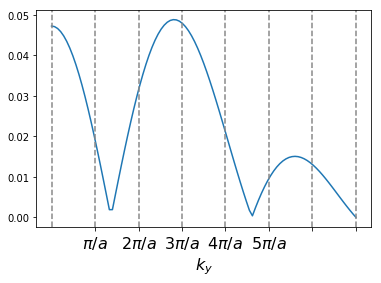

In [76]:
# Ideal spectrum
ky_ana = np.linspace(0, 7*pi/a, num=101)
Etilde_ideal = Etilde_analytic(ky_ana, array([0.2, 0, 0.5, 0, 0.1]), a)

fig, ax = plt.subplots()
ax.plot(ky_ana, np.abs(Etilde_ideal))

# shows where the modes 1,2,... are
for mode_index in range(8):
    axvline(mode_index*pi/a, color='#888888', linestyle='--')
xticks(arange(1,8)*pi/a, ('$\pi/a$', '$2\pi/a$', '$3\pi/a$', '$4\pi/a$', '$5\pi/a$'), size=16)
ax.set_xlabel('$k_y$', size=16)

Clearly, there is something strange wite the analytical spectrum! This is in fact normal, since the initial field "wideband" (from $x\in [0,a]$) is not large enough, which leads to a reduced precision in spectral dimension. So the solution would be to consider that the field is not terminated at the boundaries $x=0$ and $x=a$ and instead to consider it as infinite (undefinite Fourier integral):

$$
\tilde{E}_{tot}(k_x,k_z) =
\frac{1}{2\pi}
\sum_{m=1}^M E_m 
\int_z  e^{j (k_z-\beta_m)  z} \, dz
\cdot
\int_{x=-\infty}^{+\infty} \sin\left( \frac{m\pi}{a} x\right) e^{j k_x x} \,dx 
$$

Now we calculates the spectrum of the field from the spatial fields, using the Fast Fourier Transform:

In [60]:
# index of the measurement row (0, 1 or 2)
# TODO : find a way to use all the rows ? 
index_row = 0

x_mes2 = x_mes
E_mes2 = Emeas[:,index_row]

# interpolating the measurements in order to have smoother initial values
from scipy.interpolate import InterpolatedUnivariateSpline
ius_re = InterpolatedUnivariateSpline(x_mes2, real(E_mes2))
ius_im = InterpolatedUnivariateSpline(x_mes2, imag(E_mes2))

x_mes3 = linspace(x_mes2[0], x_mes2[-1], 101)
E_mes3 = ius_re(x_mes3) + 1j*ius_im(x_mes3)

# Padding the measurements by replicating the data, 
# in order to have a better fourier domain precision
# (the larger spatial wideband, the better the precision)
# The trick is to replicate correctly, taking into account the symmetry of the field
x_mes4 = np.pad(x_mes3, (2**13,), 'reflect', reflect_type='odd')
E_mes4 = np.pad(E_mes3, (2**13,), 'reflect', reflect_type='odd')

Text(0,0.5,'imag E')

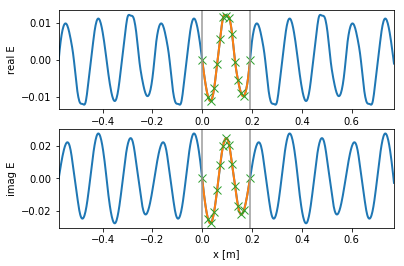

In [61]:
fig, ax = plt.subplots(2,1)
ax[0].plot(x_mes4, real(E_mes4), lw=2) # replicated interpolated data
ax[0].plot(x_mes3, real(E_mes3), lw=2) # interpolated data
ax[0].plot(x_mes, real(Emeas[:,index_row]), 'x', ms=8) # initial data
ax[0].set_xlim(-3*a, 4*a)
ax[0].axvline(0, color='#999999')
ax[0].axvline(a, color='#999999')
ax[0].set_ylabel('real E')

ax[1].plot(x_mes4, imag(E_mes4), lw=2) # replicated interpolated data
ax[1].plot(x_mes3, imag(E_mes3), lw=2) # interpolated data
ax[1].plot(x_mes, imag(Emeas[:,index_row]), 'x', ms=8)
ax[1].set_xlim(-3*a, 4*a)
ax[1].axvline(0, color='#999999')
ax[1].axvline(a, color='#999999')
ax[1].set_xlabel('x [m]')
ax[1].set_ylabel('imag E')

In [62]:
from numpy.fft import fft, fftshift, fftfreq

Text(0.5,0,'$k_y$')

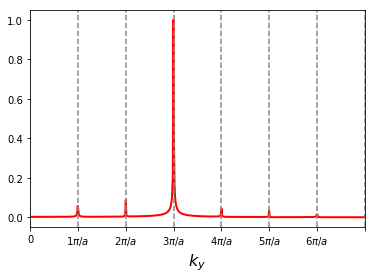

In [63]:
# Calcul the numerical spectrum
ky_num = 2*pi*fftshift(fftfreq(len(x_mes4), d=x_mes4[1]-x_mes4[0]))
Etilde_num = fftshift(fft(E_mes4))

fig,ax=subplots()
ax.plot(ky_num, abs(Etilde_num)/max(abs(Etilde_num)), lw=2, color='r') 
ax.set_xlim(0, 1.5)

# shows where the modes 1,2,... are
for mode_index in range(8):
    ax.axvline(mode_index*pi/a, color='#888888', linestyle='--')
ax.set_xticks(np.arange(0,8)*pi/a)
ax.set_xticklabels([0] + [f'${m}\pi/a$' for m in range(1,7)])
ax.set_xlabel('$k_y$', size=16)

# TODO : calculates the relative height of the peak to deduce the mode % content

Using this technique, we clearly see the TE30 mode is the dominant one.

# Using orthonormalization properties
In this section we use the fact that waveguide modes form a complete spectrum. The mode base is orthonormal, thus that:
$$
\int_0^a 
\sin\left( \frac{m \pi}{a} x \right)
\sin\left( \frac{n \pi}{a} x \right)
dx =
\left\{
\begin{array}{lr}
a/2 & \mathrm{if} \; m=n \\
0 & \mathrm{if}  \; m\neq n
\end{array}
\right.
$$

For a given $z$, we such multiply by $\sin(m \pi/a)$ and integrate between $[0,a]$ the measured data:

Text(0.5,1,'interpolated measurements')

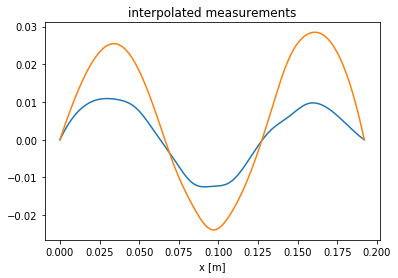

In [42]:
def interpolate_measurements(row_index, num_points=501):    
    # Add two points, at x=0 and x=a, to the measurements.
    # They are the edges of the waveguides, thus the field is zero here.
    x = x_mes
    E = Emeas[:,row_index]

    # interpolating the measurements in order to have smoother initial values
    from scipy.interpolate import InterpolatedUnivariateSpline
    ius_re = InterpolatedUnivariateSpline(x, real(E))
    ius_im = InterpolatedUnivariateSpline(x, imag(E))

    x2 = linspace(x[0], x[-1], num_points)
    E2 = ius_re(x2) + 1j*ius_im(x2)
    
    return x2, E2

x2, E2 = interpolate_measurements(1)
plot(x2, real(E2), x2, imag(E2))
xlabel('x [m]')
title('interpolated measurements')

In [43]:
def orthonorm(x, E, number_of_modes=5):
    Im = []
    for m in arange(1, number_of_modes+1):
        integrande = E * sin(m*pi/a*x)
        Im.append(2/a*trapz(x, integrande))
    return asarray(Im)

[  5.65665816   6.54624722  81.53197556   3.75554936   2.5095697 ]
[  8.12584234   2.63207468  82.15273649   5.58725174   1.50209474]
[  5.27194539   2.57758371  85.36980759   2.92600946   3.85465386]


(0, 0.04)

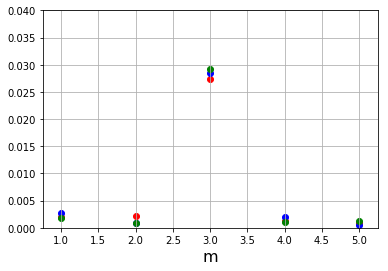

In [44]:
colors = ['b','g','r']
for idx_row in [0,1,2]:
    x2, E2 = interpolate_measurements(idx_row)
    Im = orthonorm(x2, E2)
    scatter(arange(1,len(Im)+1), abs(Im), color=colors[idx_row-1])
    print(abs(Im)/norm(Im,1)*100)
grid(True)
xlabel('m', size=16)
ylim(0,0.04)


We can see on the picture above that the TE30 mode is dominant, but that there is some TE10 and other mode also present. Almost 81 to 85% of the TE30 modes, and between 5-8% for the TE10 mode.

# Solving a linear system

This approach is derived from A.G.Bailey et al. paper, _Experimental Determination of Higher Order Mode Conversion in a Multimode Waveguide_. Here, the electric field in the waveguide is supposed to be :

$$
E_y(x,z) = 
\sum_{m=1}^4  
a_m \sin\left(\frac{m\pi}{a}x\right) e^{- j\beta_m z}
+
b_m \sin\left(\frac{m\pi}{a}x\right) e^{+ j\beta_m z}
$$

Since measurements give both real and imaginary parts of the previous expression, in the form of magnitude $A(x,z)$ and phase $\gamma(x,z)$, one has:

$$
A(x,z) \cos\gamma(x,z) = 
\sum_{m=1}^4  
|a_m| 
\sin\left(\frac{m\pi}{a}x\right) 
\cos\left(\theta_m - \beta_m z\right)
+
|b_m| 
\sin\left(\frac{m\pi}{a}x\right) 
\cos\left(\theta_m - \beta_m z\right)
$$

and

$$
A(x,z) \sin\gamma(x,z) = 
\sum_{m=1}^4  
|a_m| \sin\left(\frac{m\pi}{a}x\right) \sin\left(\theta_m - \beta_m z\right)
+
|b_m| \sin\left(\frac{m\pi}{a}x\right) \sin\left(\theta_m - \beta_m z\right)
$$

# Appendix

## Fourier transform integral calculation

Here, using [SymPy](http://www.sympy.org) we want to calculate the integral:
$$
\int_{x=0}^a\sin\left( \frac{m\pi}{a} x\right) e^{j k_x x} \,dx
$$

In [45]:
import sympy as s
s.init_printing() # render formula nicely

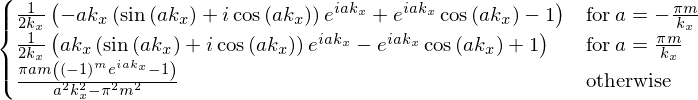

In [46]:
x_, k_x_ = s.symbols('x k_x', real=True) 
a_ = s.symbols('a', positive=True) 
m_ = s.symbols('m', integer=True, positive=True)
I = s.integrate( s.sin(m_*s.pi/a_*x_) * s.exp(s.I*k_x_*x_), (x_, 0, a_))
I.simplify()

The latter can be expressed as:
$$
\frac{\frac{m\pi}{a}}{k_x^2 - \left(\frac{m\pi}{a}\right)^2 }
\left(
(-1)^m e^{j k_x a} -1
\right)
$$

In the case of an undefinite integral ($x\in\mathbb{R}$):

In [87]:
# Unfortunately, SymPy does not know how to compute the FT of a sinus :
s.fourier_transform(s.sin(m_*pi/a_*x_),x_, k_x_, noconds=True)

And we recall the definition of the Dirac Delta function:

$$
\int_z  e^{j (k_z-\beta_m)  z} \, dz
=
2\pi \delta(k_z-\beta_m)
$$

## Numerical Fourier Transform - option 2

In [47]:
# This function calculates the FFT of the field 
# and the corresponding wavenumber axis. 
# This function is not used in this notebook, and just given here for example.
# (The wavenumber axis can be constructed instead with the fftfreq function)
def calculate_spectrum(x, E, f=3.7e9):
    k0 = 2*pi*f/c
    lambda0 = c/f
    # fourier domain points
    B = 2**18
    Efft = np.fft.fftshift(np.fft.fft(E,B))
    
    # fourier domain bins
    dx = x[1] - x[0] # assumes spatial period is constant
    df = 1/(B*dx)
    K = arange(-B/2,+B/2)
    # spatial frequency bins
    Fz= K*df
    # spatial wavenumber kx
    kx= (2*pi)*Fz
    # "power density" spectrum
    p = (dx)**2/lambda0 * Efft;
    
    return(kx,p)

### CSS Styling

In [88]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()